# TP-1 : 

## Partie 1 : Preparation

1 - Chargement de l'image 

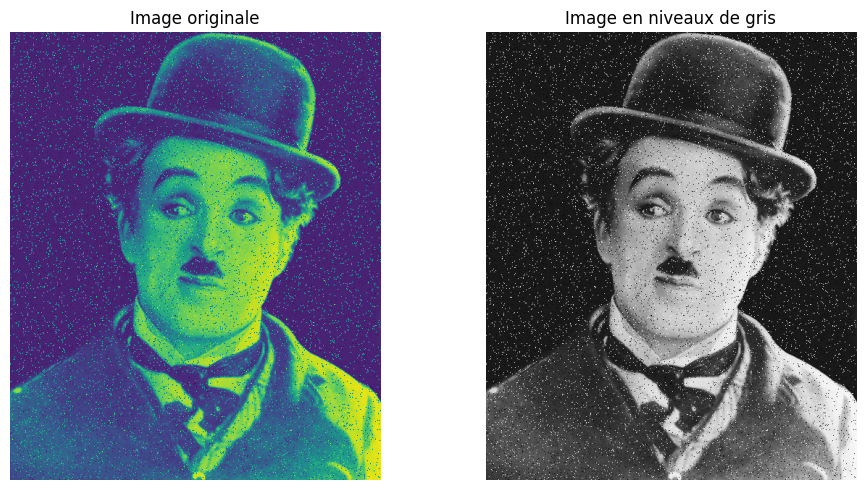

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#charger une image en couleur
image_path = (r"Z:\Study\MrSoualah\TP1-A-Remettre\img\charlie.jpg")
image = Image.open(image_path)

#conversion en niveaux de gris
image_gray = image.convert("L")

#affichage
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Image originale")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image en niveaux de gris")
plt.imshow(image_gray, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


### 2. Représentation matricielle

In [2]:
#représentation matricielle
image_array = np.array(image_gray)

#dimension de l'image
height, width = image_array.shape
print(f"Dimensions de l'image : {height}x{width}")

#valeurs min et max des pixels
pixel_min = image_array.min()
pixel_max = image_array.max()
print(f"Valeurs des pixels : Min={pixel_min}, Max={pixel_max}")

Dimensions de l'image : 619x512
Valeurs des pixels : Min=0, Max=255


# Partie 2 : Implémentation de la convolution

#### 1. Implémentation de la convolution 

In [3]:
def convolution(image, kernel, padding_type="zero"):

    kernel = np.flipud(np.fliplr(kernel))  # Retourne le noyau
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    #ajouter du padding
    if padding_type == "zero":
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant")
    elif padding_type == "reflect":
        padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode="reflect")
    else:
        raise ValueError("Type de padding non supporté")

    #créer une matrice pour le résultat
    output = np.zeros_like(image)

    #appliquer la convolution
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            local_patch = padded_image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(local_patch * kernel)
    
    return output


### 2. Application de filtres prédéfinis

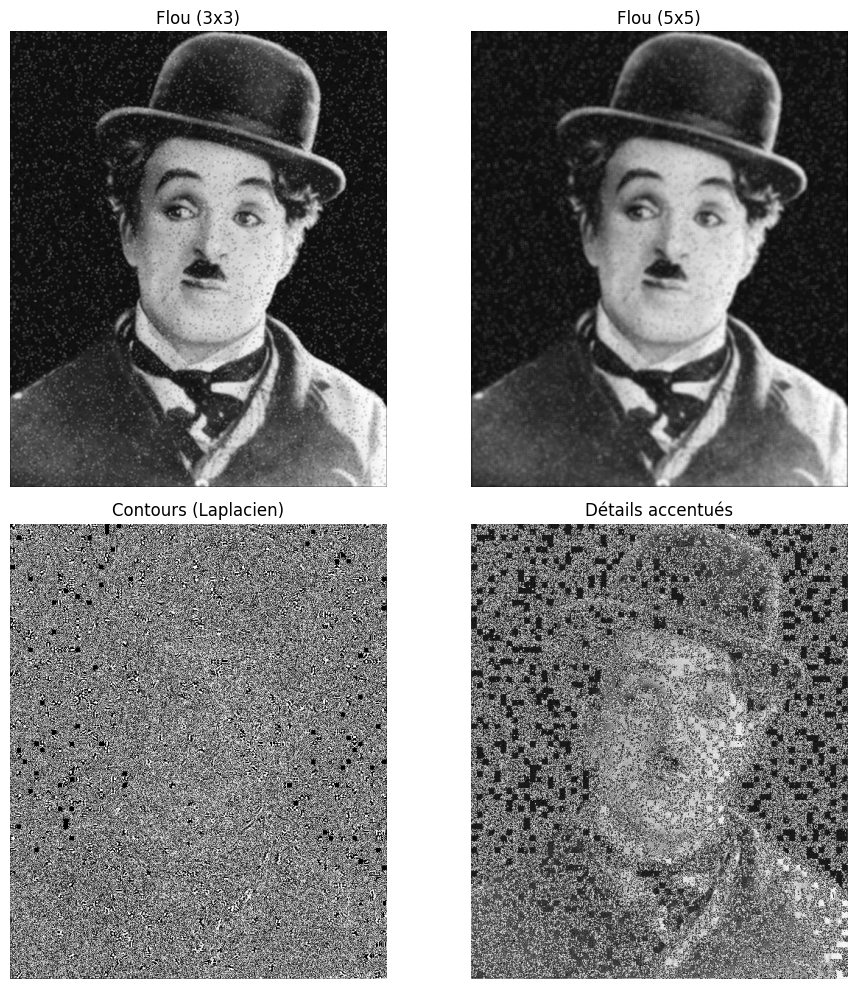

In [4]:
#noyaux prédéfinis
blur_kernel_3x3 = np.ones((3, 3)) / 9  # Flou 3x3
blur_kernel_5x5 = np.ones((5, 5)) / 25  # Flou 5x5
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])  # Détection de contours
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Accentuation des détails

#appliquer chaque filtre
image_blur_3x3 = convolution(image_array, blur_kernel_3x3)
image_blur_5x5 = convolution(image_array, blur_kernel_5x5)
image_edges = convolution(image_array, laplacian_kernel)
image_sharpen = convolution(image_array, sharpen_kernel)

#affichage
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Flou (3x3)")
plt.imshow(image_blur_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Flou (5x5)")
plt.imshow(image_blur_5x5, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Contours (Laplacien)")
plt.imshow(image_edges, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Détails accentués")
plt.imshow(image_sharpen, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

# Partie 3: Filtrage Non-Linéaire

### Filtrage Médian

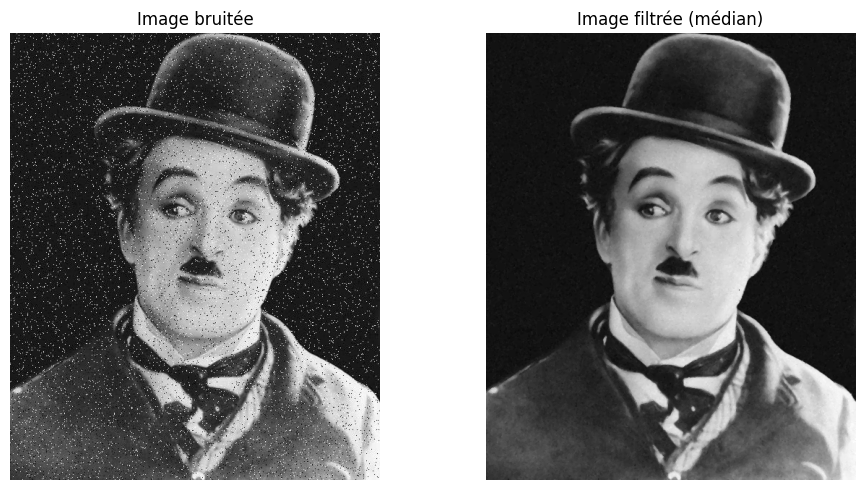

In [5]:
from scipy.ndimage import median_filter

#appliquer le filtre médian
image_noisy = image_array.copy()  # Ajouter du bruit si nécessaire
image_median = median_filter(image_noisy, size=3)  # Taille du voisinage : 3x3

#affichage
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Image bruitée")
plt.imshow(image_noisy, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Image filtrée (médian)")
plt.imshow(image_median, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

# Partie 4 : Comparaison des résultats 

## 1- visualisation:

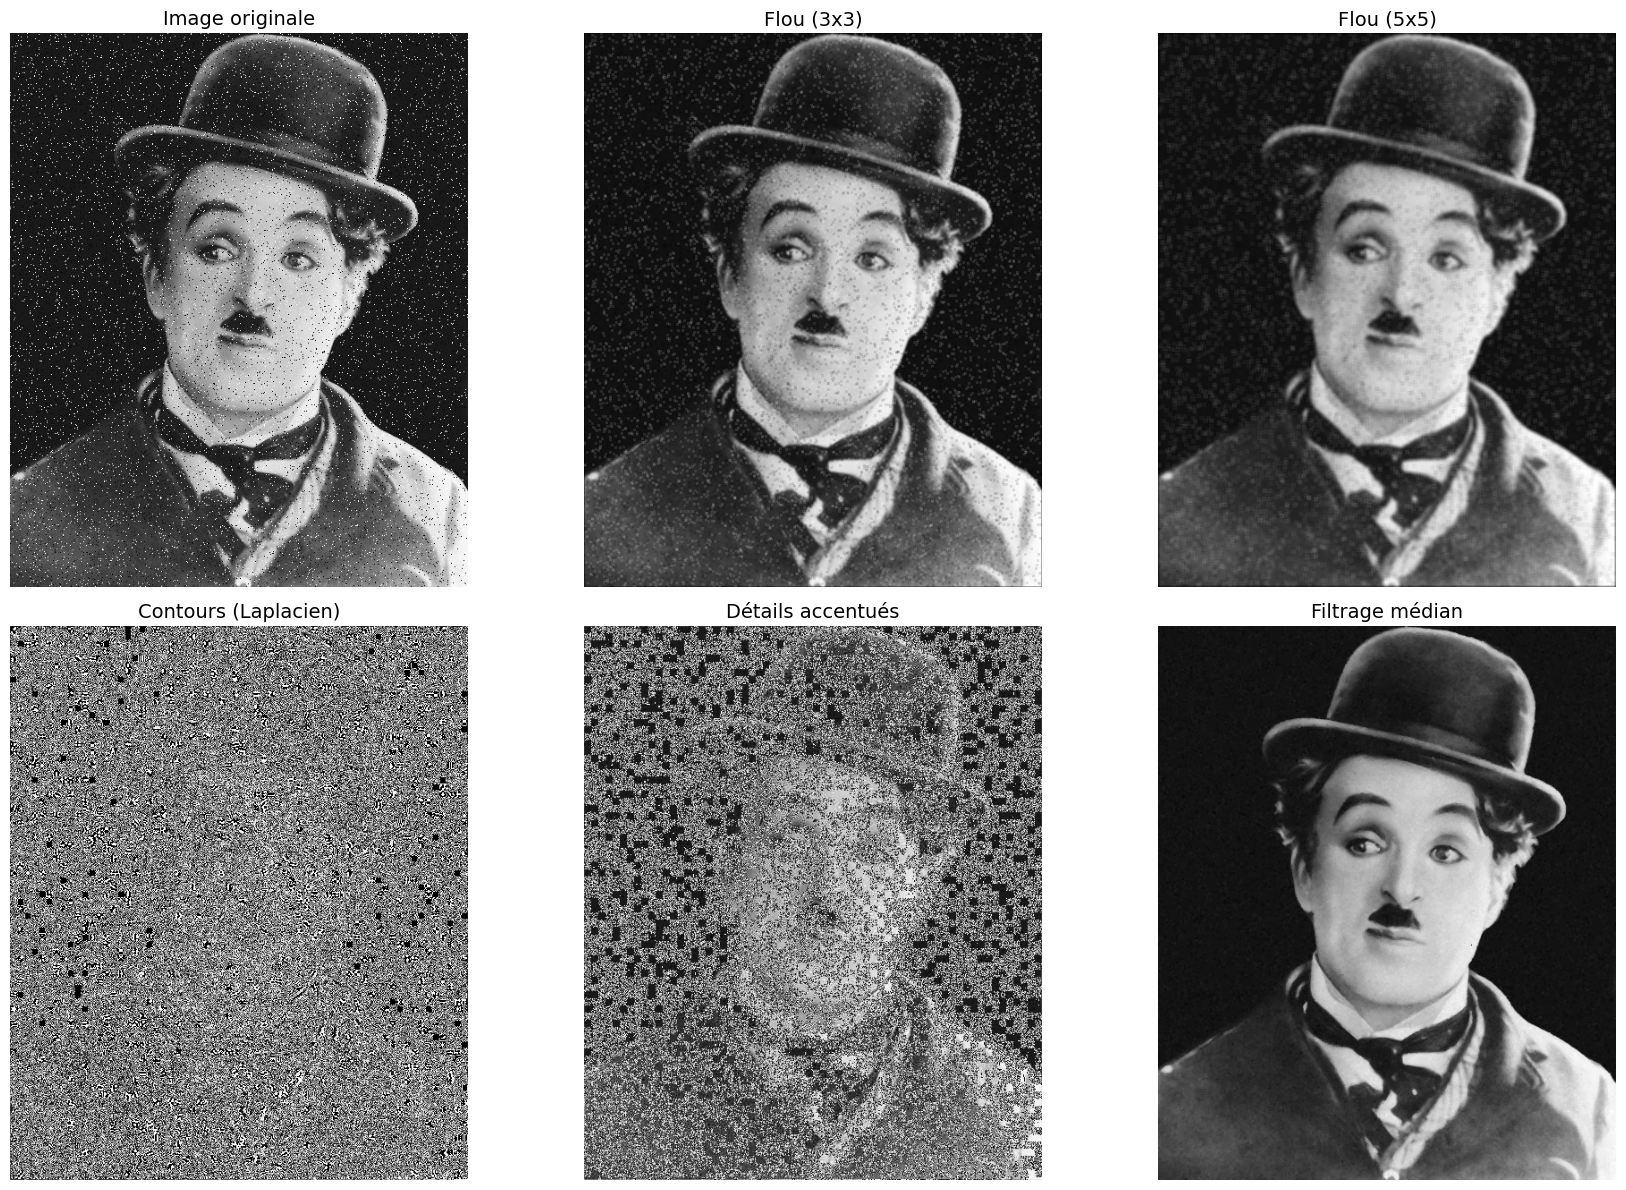

In [6]:
#comparaison visuelle améliorée
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Crée un tableau 2x3 pour les images

# Image originale
axs[0, 0].imshow(image_array, cmap="gray")
axs[0, 0].set_title("Image originale", fontsize=14)
axs[0, 0].axis("off")

# Flou (3x3)
axs[0, 1].imshow(image_blur_3x3, cmap="gray")
axs[0, 1].set_title("Flou (3x3)", fontsize=14)
axs[0, 1].axis("off")

# Flou (5x5)
axs[0, 2].imshow(image_blur_5x5, cmap="gray")
axs[0, 2].set_title("Flou (5x5)", fontsize=14)
axs[0, 2].axis("off")

# Détection des contours (Laplacien)
axs[1, 0].imshow(image_edges, cmap="gray")
axs[1, 0].set_title("Contours (Laplacien)", fontsize=14)
axs[1, 0].axis("off")

# Détails accentués (Sharpen)
axs[1, 1].imshow(image_sharpen, cmap="gray")
axs[1, 1].set_title("Détails accentués", fontsize=14)
axs[1, 1].axis("off")

# Filtrage médian
axs[1, 2].imshow(image_median, cmap="gray")
axs[1, 2].set_title("Filtrage médian", fontsize=14)
axs[1, 2].axis("off")

# Ajustement de l'espacement
plt.tight_layout()
plt.show()
